# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
sns.set()

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


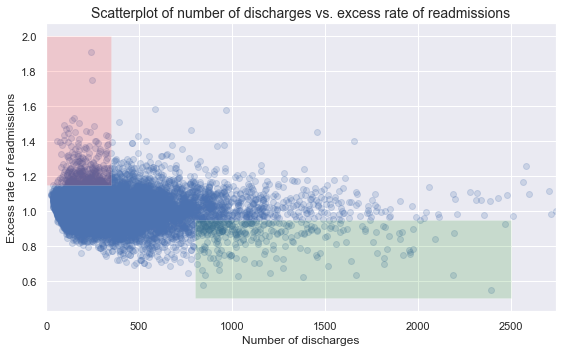

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])


fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [7]:
df = clean_hospital_read_df

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**

> *The below statement is possibly misleading and unfounded. While there are hospitals with
> a large amount of discharges that have a lower rate of admissions, this is not proven or shown
> with a regression analysis. This is largely based on Visual EDA. More analysis is needed to prove the assertion.*

+ Overall, rate of readmissions is trending down with increasing number of discharges

> *The statements below has the same challenges from above. Also - there is a need to investigate outliers to determine
> validity of the data and document findings.*

+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**

> *Through my analysis, I found that the readmission rate is 1.023 and value of 59% of readmissions greater than 1 .*

+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 

>*Through my analysis, I found that the readmission rate is .978 with a readmision rate of 44% greater than 1*

+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

>*There is no hypothesis test to determine if .978 is a significantly different from 1.023*

**C. Conclusions**
>*There was no correlation analysis constructed in the above documentation*

+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 

>*There is no data to support the below claim in terms of resources. There is no data to support the size of hospitals, only
>the number of discharges. More questions and answers are needed.*

+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**


+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

##### (Answer) No, I do not agree with the above analysis and recommendations. 
***See comments to statements above in the report***
+ There was no visual EDA around the statistic that was being measured and compared (the readmission ratio - expected / predicted readmissions), only discharges and readmissions.
+ Analysis/correlation was determined by the visual EDA, there was no correlation analysis completed on the data
+ There was no hypothesis testing completed to determind significance
+ Recommendations were given where there was no supporting data (lack of resources)
+ There was no documentation to some of the work that was completed (ie. readmission ratio, % > 1 readmissions rates)
+ There was no establishment & consistent use of what a 'small' hospital is. There is an assumption of size based on number of discharges
+ Not necessarily an agreement/disagreement with the analysis. More of a comment - there was a moment where different methods were used to process data:

> x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]

> y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])


### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1. Setup an appropriate hypothesis test.
2. Compute and report the observed significance value (or p-value).
3. Report statistical significance for  𝛼  = .01.
4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
5. Look at the scatterplot above.
    + What are the advantages and disadvantages of using this plot to convey information?
    + Construct another plot that conveys the same information in a more direct manner.

#### Check for Normality
Normal conditions with T-intervals

* **Sample size >= 30** 
    * The sample size for the data is 130, this meets the >= 30 criteria
* If sample size is <30, then the original data distribution should be normal or if the data is approx. symmetric around the mean.
    * see below for graphical displays of the data

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


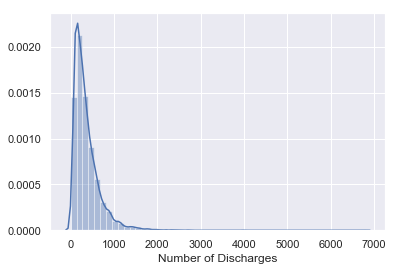

In [8]:
_=sns.distplot([df['Number of Discharges'].dropna()], axlabel = 'Number of Discharges')


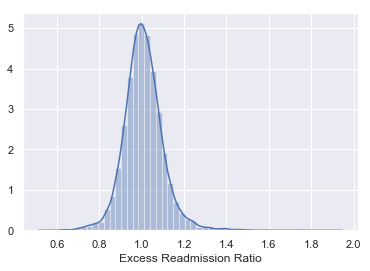

In [9]:
_= sns.distplot([df['Excess Readmission Ratio'].dropna()], axlabel = 'Excess Readmission Ratio', norm_hist = True)

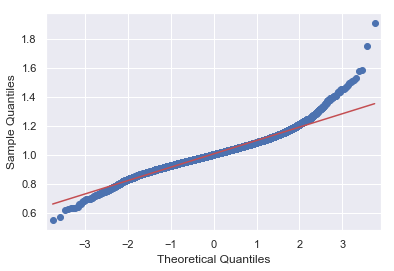

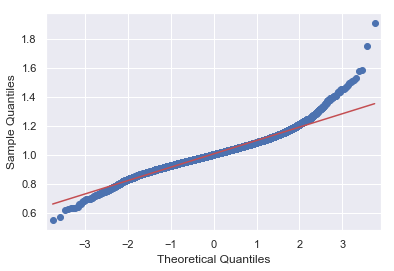

In [10]:
qqplot(df['Excess Readmission Ratio'].dropna(), line = 's')

In [11]:
len(df['Excess Readmission Ratio'].dropna())

11497

**Normality Test Statistical Method**

In [12]:
stat, p = stats.normaltest(df['Excess Readmission Ratio'].dropna())
print ('p-value:', p)

p-value: 0.0


From the visuals above:
+ The Excess Readmittion Ratio observations appears symetrical & bell shaped.
+ The sample size is above the 30 threshold with 11,497 observations
+ Using the normal probability plot, the Excess Readmission data falls primarily on the line closely fitting the pattern of a normal curve.
+ The p-value (0.0) shows that we must reject H0, that the Excess Readmission Ratio data is a normal distribution.

H0: There is no relationship between number of discharges and the Excess Readmission Ratio

H1: The is a relationship between number of discharges and the Excess Readmision Ratio


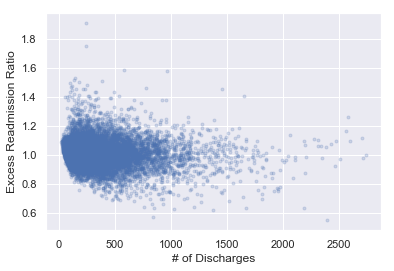

In [13]:
_ = plt.plot(x,y, marker = '.', linestyle ='none', alpha = .2)
_ = plt.xlabel('# of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')

In [14]:
def pearson_r (x, y):
    """ Compute Pearson correlation coefficient between two arrays."""
    #Compute correlation matrix
    corr_mat = np.corrcoef(x,y)
    
    #return entry [0,1]
    return corr_mat[0,1]

In [15]:
r = pearson_r(x, y)
r

-0.09309554287590442

In [16]:
stats.pearsonr(x,y)

(-0.09309554287590441, 1.5022756426464526e-23)

In [17]:
slope, inter = np.polyfit(x,y, 1)
print(slope, inter)

-2.856505294381995e-05 1.01794755795442


The correlation coefficienct shows that there is a very small, weak correlation between the two variables.
The small p value suggests that this small correlation is significant and we can reject the null hypothesis that these two
vairables are uncorrelated.

The slope & intercept suggest that there is a .00002 reduction of the Excess Admission Ratio for every 1 Discharged Patient. Shown visually below.

In [18]:
#create a theoretical line to plot
x2 = np.array([0,2800])
y2 = slope * x2 + inter

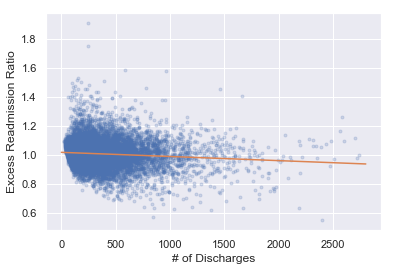

In [19]:
#Create a scatter plot with the regression line
_ = plt.plot(x,y, marker = '.', linestyle ='none', alpha = .2)
_ = plt.xlabel('# of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')


#add regression line to the plot
_=plt.plot(x2, y2)

Perform a pairs bootstrap for linear regression to determine the CI for the observed slope.

In [20]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

In [21]:
# take the data as numpy arrays rather than lists, and reste indexes that were previously sorted

ndf = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']][81:-3]
ndf = ndf.dropna()
ndf = ndf.reset_index()
ndf = ndf[['Number of Discharges', 'Excess Readmission Ratio']]
x_n = ndf['Number of Discharges']
y_n = ndf['Excess Readmission Ratio']

In [22]:
# generate replicates of slope and interecept using pairs bootstrap
bs_slope_reps, bs_interecept_reps = draw_bs_pairs_linreg(x_n, y_n, 1000)

#Compute and print 99% CI for slope
print(np.percentile(bs_slope_reps, [.5, 99.5]))

[-3.67370083e-05 -1.92510725e-05]


We are 99% confident (.01 significance) that the true slope of the Excess Readmission ratio & Discharge is between -.000037 and -.0000193. See visually below where the actual observed slope lies.

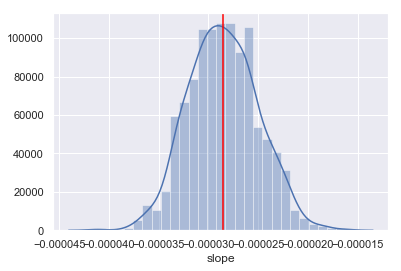

In [23]:
#plot the histogram of bs slopes
_= sns.distplot((bs_slope_reps),norm_hist = True, axlabel = 'slope')
_=plt.axvline(x=-2.856505294381995e-05, color = 'red')


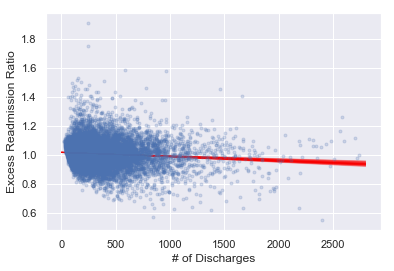

In [24]:
#Plot the bootstrap lines onto the scatter plot
for i in range (100):
    _ = plt.plot(x2, bs_slope_reps[i]*x2 +  bs_interecept_reps[i], linewidth=.5, alpha=.2, color = 'red')

_ = plt.plot(x,y, marker = '.', linestyle ='none', alpha = .2)
_ = plt.xlabel('# of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')
plt.show()

Is there a difference in the readmission excess ratio in hospitals below 100 patients discharged and those greater than 1,000?

H0: There is no difference between these two groups' readmission excess ratio; H <100 == H>1000

H1: There is a difference between these two groups' readmission excess ratio; H<100 != H>1000

In [25]:
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
df = clean_hospital_read_df


In [26]:
#subset the data for hospitals less than 100 or greater than 1000 discharges
less_100 = df[df['Number of Discharges']<100]
more_1k = df[df['Number of Discharges']>1000]


In [27]:
print('Hospitals with < 100 Discharges:', len(less_100))
print('Mean excess admission ratio: ', np.mean(less_100['Excess Readmission Ratio']))
print('% of hospitals >1: ', len(less_100[less_100['Excess Readmission Ratio']>1])/len(less_100))


Hospitals with < 100 Discharges: 1269
Mean excess admission ratio:  1.0226183501683486
% of hospitals >1:  0.5918045705279747


In [28]:
print('Hospitals with < 100 Discharges:', len(more_1k))
print('Mean excess admission ratio: ', np.mean(more_1k['Excess Readmission Ratio']))
print('% of hospitals >1: ', len(more_1k[more_1k['Excess Readmission Ratio']>1])/len(more_1k))

Hospitals with < 100 Discharges: 463
Mean excess admission ratio:  0.9783354211663071
% of hospitals >1:  0.4449244060475162


Now, test the claim that these are indeed significally different values.

**Bootstrap approach**

In [29]:
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [30]:
def draw_bs_reps(data, func, size = 1):
    """ Draw bootstrap replicates."""
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

In [31]:
#seperate out the Excess Readmittion ratio into a numpy array from the df
less_100 = less_100['Excess Readmission Ratio']
more_1k = more_1k['Excess Readmission Ratio']

In [32]:
#find the observed difference in the means
diff_obs = np.mean(less_100) - np.mean(more_1k)
diff_obs

0.04428292900204145

In [33]:
#mean of the Excess Readmittion Ratio dataset together
ttl_mean = df['Excess Readmission Ratio'].mean()

In [34]:
#Generate shifted data sets for both hospitals so that the means of each is the mean of the total dataset together
less_shift = less_100 - np.mean(less_100) + np.mean(ttl_mean)
more_shift = more_1k - np.mean(more_1k) + np.mean(ttl_mean)
less_shift = less_shift.dropna()

In [35]:
#Generate bootstrap replicates of the mean each for the two shifted arrays
bs_reps_l = draw_bs_reps(less_shift, np.mean, 10000)
bs_reps_m = draw_bs_reps(more_shift, np.mean, 10000)

#get replicates of difference of means
bs_reps = bs_reps_l - bs_reps_m

In [36]:
#compute and print p-value
p = np.sum(bs_reps >= diff_obs) / len(bs_reps)
p

0.0

In [37]:
np.percentile(bs_reps, [.5, 99.5])

array([-0.0147675 ,  0.01509509])

There are no instances where the difference in means is greater than the observed difference of .044. The 99% confidence interval in for difference in the means is -.015 to .015. View histogram below.

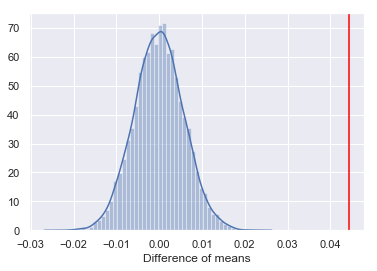

In [38]:
#plot the histogram of bs slopes
_= sns.distplot((bs_reps),norm_hist = True, axlabel = 'Difference of means')
_=plt.axvline(x=diff_obs, color = 'red')

**Frequentist Approach**

In [39]:
#  two-sample t-test
from scipy.stats import ttest_ind
t_val, p_val = ttest_ind(less_100, more_1k)
print (p_val)

nan


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


From the p-values we can reject the null hypothesis and accept that there is a difference between hospitals with < 100 discharges and those with > 1000 discharges.

**Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**

There is statistical significance between these two. Though I am not sure this supports the recommended changes give to the client. When visually looking at the data below, we see that the bulk of the data is similar between the two categories, and there are outliers for the 'less than 100' group with higher excess readmission ratios. More discovery is needed to investigate this cause to make better recommendations.

Using the Discharge number as a metric for hospital size is not valid. 

Recommending that hospitals merge and increase their size to become larger is not practical for many reasons. Hospitals in small towns with no other hospitals nearby, the cost of merging hospitals, physician/patient ratio, are a few reasons.

I would change the policy recommendations to reflect other factors that can be the cause of increased readmission rates. For example, for hospitals with lower than 100 Number of discharges should be required to show satisfactory performance metrics on other factors that affect Readmission Rates.

In [40]:
dd = df[['Number of Discharges', 'Excess Readmission Ratio']]

In [41]:
def col_def (row):
    val = row['Number of Discharges']
    if val < 100:
        return 'Less Than 100'
    if val > 1000:
        return 'More than 1000'
    else:
        return(float('NaN'))

In [42]:
dd['Discharge Category'] = dd.apply(col_def, axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


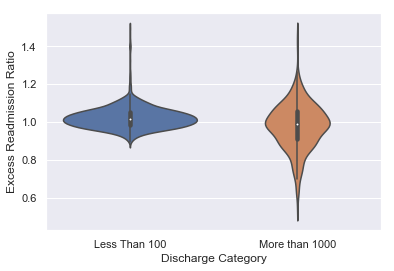

In [43]:
_=sns.violinplot(x = 'Discharge Category', y = 'Excess Readmission Ratio',data = dd)

Look at the scatterplot above.
 + What are the advantages and disadvantages of using this plot to convey information?
    + Advantages:
        + Easy to identify ideal & problematic value areas
        + Easy to generally spot trends, outliers, and density of the data
    + Disadvantages:
        + No specific statistical data shown (trend line, correlation)
        + Difficult to group data points to a specific category, moreso with many data points
 + Construct another plot that conveys the same information in a more direct manner.

#### Example 1 : Violin & Box plots

In [44]:
def col_def2 (row):
    val = row['Number of Discharges']
    if val < 100:
        return 'Less Than 100'
    if val > 1000:
        return 'More than 1000'
    else:
        return('100-1000')

In [45]:
de = df[['Number of Discharges', 'Excess Readmission Ratio']]

In [46]:
de['Discharge Category'] = dd.apply(col_def2, axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


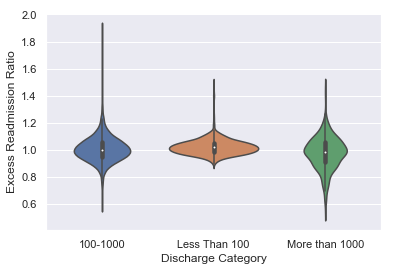

In [47]:
_=sns.violinplot(x = 'Discharge Category', y = 'Excess Readmission Ratio',data = de)

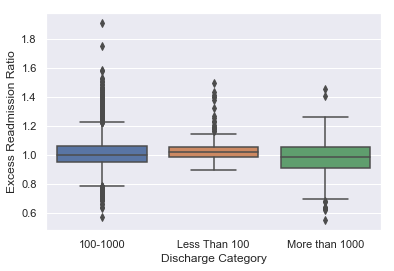

In [48]:
_=sns.boxplot(x = 'Discharge Category', y = 'Excess Readmission Ratio',data = de)

#### Eample 2: Scatterplot with the regression line

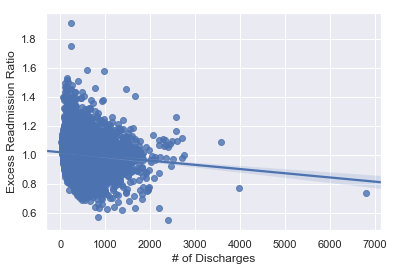

In [49]:
#Create a scatter plot with the regression line
_ = sns.regplot(x = 'Number of Discharges', y = 'Excess Readmission Ratio', data = de)
_ = plt.xlabel('# of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')


#add regression line to the plot
#_=plt.plot(x2, y2)